# Imersão de Dados 4 - Alura - Desafios Dia 2

In [199]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
data = pd.read_csv(url)

## Data pre-processing

In [200]:
data[["Moeda", "ValorAnuncio", "TipoAnuncio"]] = data["Valor"].str.split(expand=True)
data["ValorAnuncio_float"] = data["ValorAnuncio"].str.replace(".", "").astype(float)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,ValorAnuncio,TipoAnuncio,ValorAnuncio_float
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.0
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.0
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.0
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.0
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.0


## 1. Create a chart with scale of prices in millions.

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

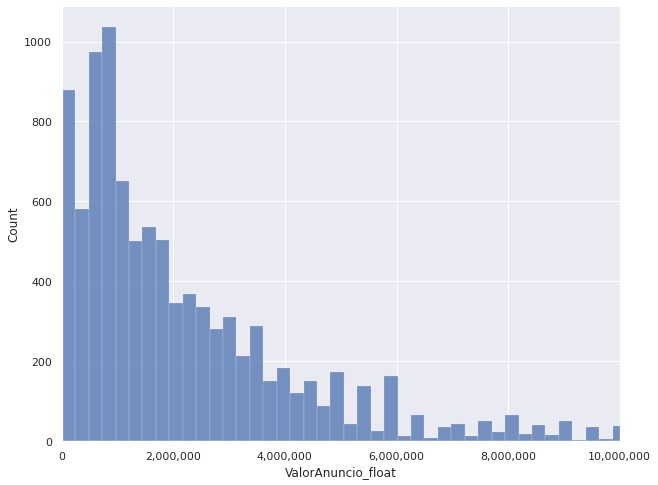

In [ ]:
plt.figure(figsize=(10,8))

ax = sns.histplot(data=data, x="ValorAnuncio_float")
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlim(-50, 10000000)
plt.show()

## 2. Make the price histogram chart readable (change labels, colors, title, scale).


In [ ]:
from babel.numbers import format_decimal

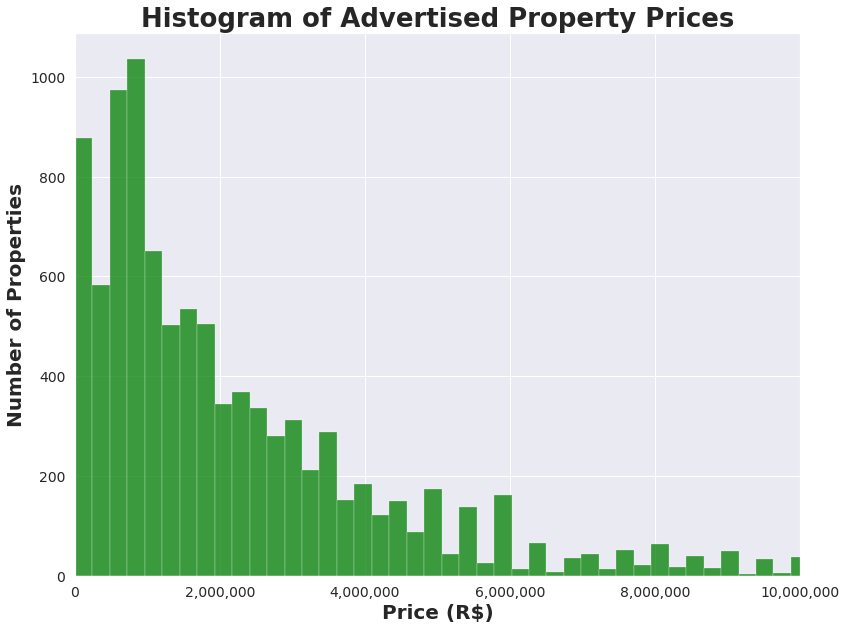

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,10))

ax = sns.histplot(data=data, x="ValorAnuncio_float", color="green")
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlim(-50, 10000000)
# plt.ylim(0, 1000)
plt.title("Histogram of Property Prices", fontsize=26, fontweight="bold")
plt.xlabel("Price (R$)", fontsize=20, fontweight="bold")
plt.ylabel("Number of Properties", fontsize=20, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

## 3. Square meter price by district and plot in an ideal chart.

In [ ]:
data["SquareMeterPrice"] = data["ValorAnuncio_float"] / data["Metragem"]
data.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,ValorAnuncio,TipoAnuncio,ValorAnuncio_float,SquareMeterPrice
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.0,7000.000000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.0,7459.677419
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.0,3040.000000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.0,2209.677419
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.0,5400.000000


In [ ]:
square_meter_prices = data.groupby("Bairro")["SquareMeterPrice"].mean().sort_values(ascending=False)
square_meter_prices

Bairro
Vila Guaca                80000.000000
Jardim Ampliação          20051.041667
Jardim Europa             17476.196923
Jardim Teresa             17465.564617
Jardim América            16981.398920
                              ...     
Ibirapuera                  103.686636
Sítio Represa                78.378378
Vila União(Zona Norte)       19.328571
Vila Noca                    15.718609
Jardim Domitila              12.347561
Name: SquareMeterPrice, Length: 701, dtype: float64

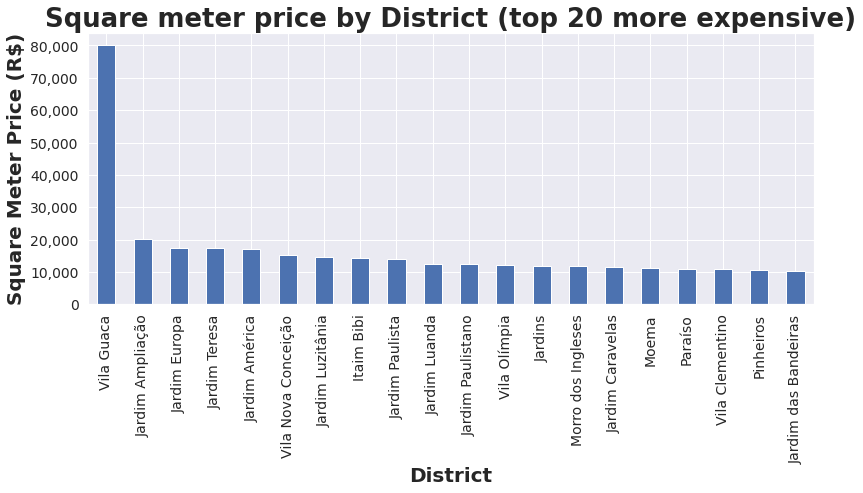

In [ ]:
plt.figure(figsize=(13,5))

ax = square_meter_prices.head(20).plot.bar()
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title("Square meter price by District (top 20 more expensive)", fontsize=26, fontweight="bold")
plt.xlabel("District", fontsize=20, fontweight="bold")
plt.ylabel("Square Meter Price (R$)", fontsize=20, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

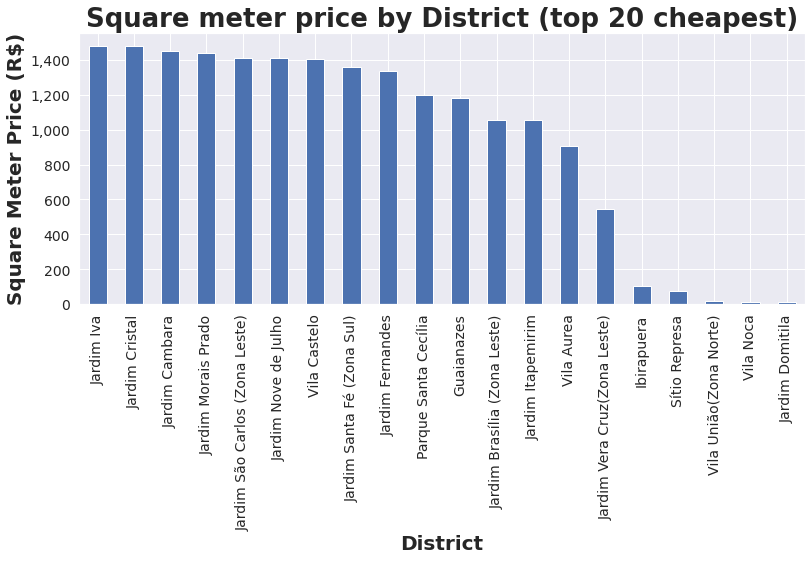

In [ ]:
plt.figure(figsize=(13,5))

ax = square_meter_prices[-20:].plot.bar()
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title("Square meter price by District (top 20 cheapest)", fontsize=26, fontweight="bold")
plt.xlabel("District", fontsize=20, fontweight="bold")
plt.ylabel("Square Meter Price (R$)", fontsize=20, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

## 4. Explore the visualization libraries and post your conclusions.

Properties with more number of rooms tend to have more bathrooms.

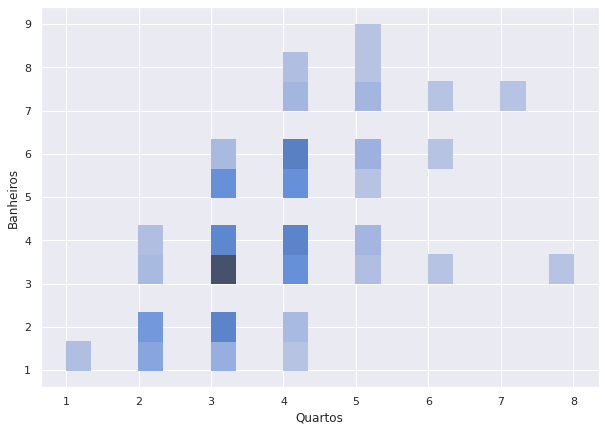

In [ ]:
plt.figure(figsize=(10,7))

data_small = data[:200]
sns.histplot(data_small, x="Quartos", y="Banheiros")

plt.show()

Nothing special to observe in this chart. It is just weird a property have more than 10 rooms and a single bathroom.

<Figure size 720x504 with 0 Axes>

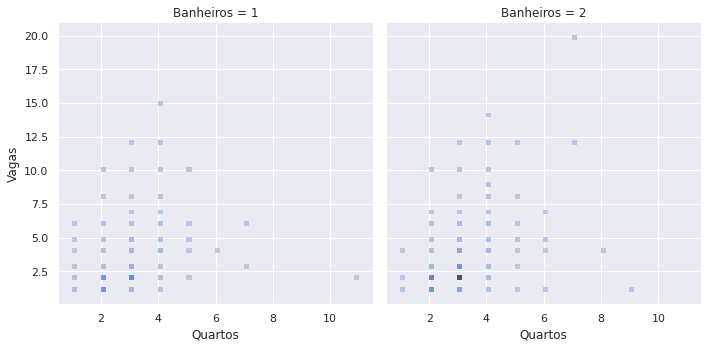

In [ ]:
plt.figure(figsize=(10,7))

bathrooms = 2
data_small = data.query("Banheiros <= 2")
sns.displot(data_small, x="Quartos", y="Vagas", col="Banheiros")

plt.show()

## 5. Search a visualization to analyze the quartiles, median and outliers.

In [ ]:
data.describe()

,Metragem,Quartos,Banheiros,Vagas,ValorAnuncio_float,SquareMeterPrice
count,10008.000000,10008.000000,10008.000000,10008.000000,1.000800e+04,10008.000000
mean,442.300659,3.483114,3.879097,4.097222,2.794170e+06,7326.232520
std,7515.379389,1.064200,1.988467,2.824014,3.866249e+06,5527.421382
min,10.000000,1.000000,1.000000,1.000000,1.650000e+03,8.250000
25%,173.000000,3.000000,2.000000,2.000000,7.500000e+05,4242.424242
50%,290.000000,3.000000,4.000000,4.000000,1.600000e+06,6153.846154
75%,460.250000,4.000000,5.000000,5.000000,3.350000e+06,9047.619048
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07,80000.000000


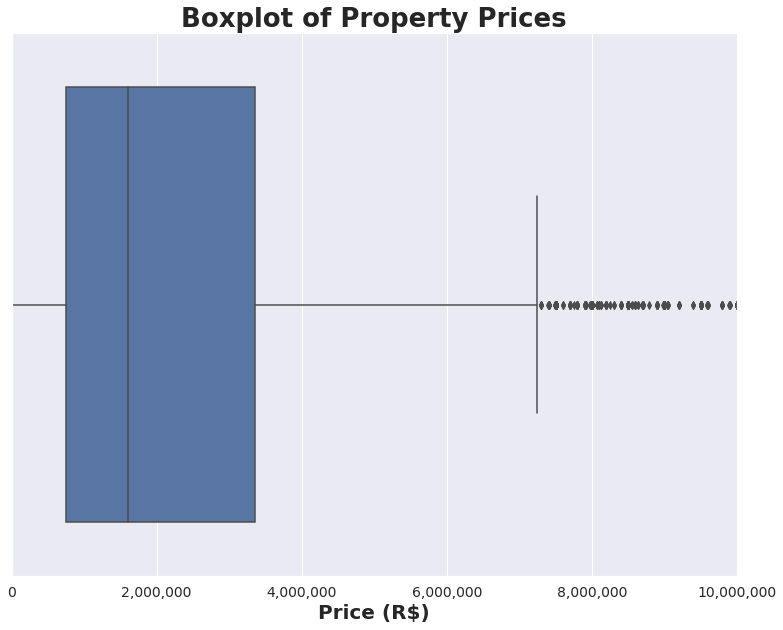

In [ ]:
plt.figure(figsize=(13,10))

ax = sns.boxplot(x=data["ValorAnuncio_float"])
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlim(-50, 10000000)
plt.title("Boxplot of Property Prices", fontsize=26, fontweight="bold")
plt.xlabel("Price (R$)", fontsize=20, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

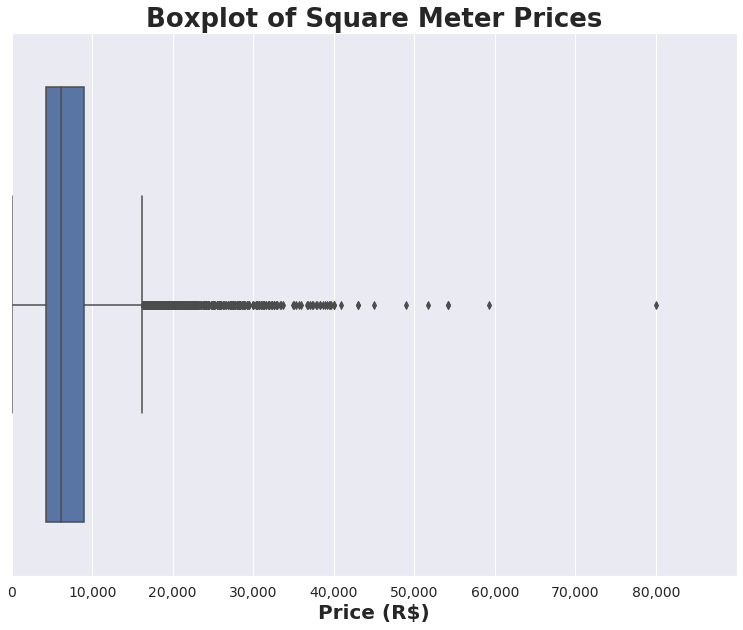

In [ ]:
plt.figure(figsize=(13,10))

ax = sns.boxplot(x=data["SquareMeterPrice"])
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlim(-50, 90000)
plt.xticks([x * 10000 for x in range(9)])
plt.title("Boxplot of Square Meter Prices", fontsize=26, fontweight="bold")
plt.xlabel("Price (R$)", fontsize=20, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

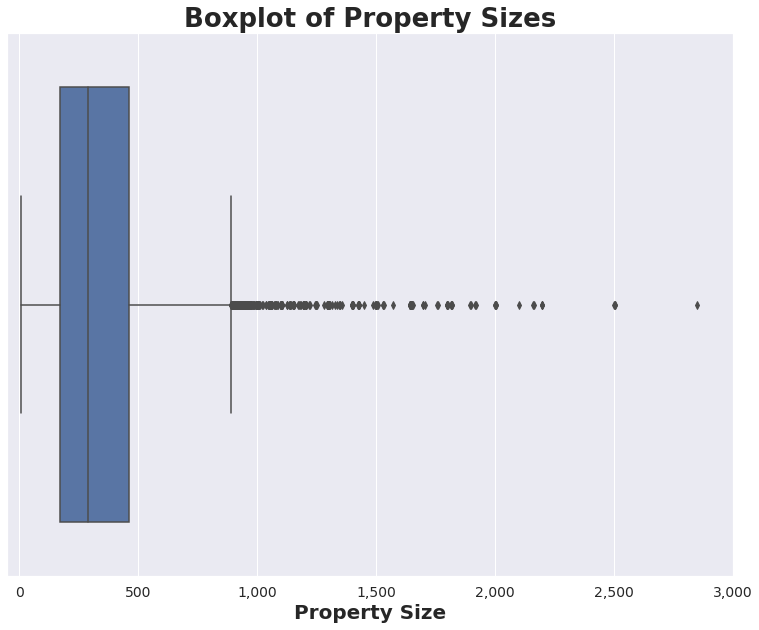

In [ ]:
plt.figure(figsize=(13,10))

ax = sns.boxplot(x=data["Metragem"])
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlim(-50, 3000)
plt.title("Boxplot of Property Sizes", fontsize=26, fontweight="bold")
plt.xlabel("Property Size", fontsize=20, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

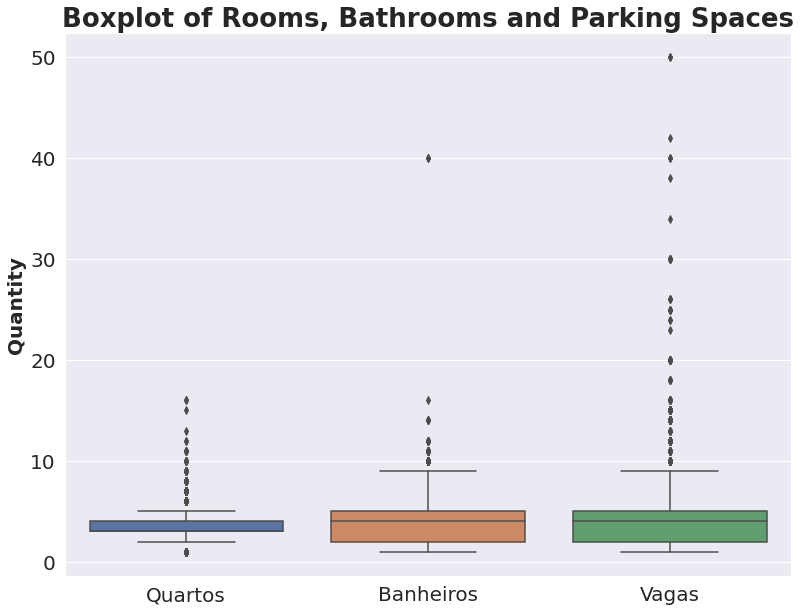

In [ ]:
plt.figure(figsize=(13,10))

ax = sns.boxplot(data=data[["Quartos", "Banheiros", "Vagas"]])

plt.title("Boxplot of Rooms, Bathrooms and Parking Spaces", fontsize=26, fontweight="bold")
plt.ylabel("Quantity", fontsize=20, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=20)

plt.show()